# Team Epic 
# Telco Customer Churn Analysis


## `Initial Data Analysis `

<h1>Table of contents</h1>


1. [Business Problem](#head1) 
2. [Introducing the dataset](#head2)
3. [Data Visualization](#head)
    * [Contract Type - Churn Relationship](#subhead1)
    * [Counting of Churn by Total charges](#subhead2)
    * [Counting of Churn by Monthly Charges](#subhead3)
    * [Gender vs Churn Relationship](#subhead4)
    * [Internet Service - Churn Relationship](#subhead5)
    * [Payment Method  - Churn Relationship](#subhead6)
    * [Multiple Lines - Churn Relationship](#subhead7)
    * [Tenure Months - Churn Relationship](#subhead8)
    * [Cities with Churn value](#subhead9)

## _Business Problem_  <a class= "anchor" id="head1"></a>

Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers. In this project, we need to explore the features that will help the company to engage with the customers and keep the customer happy. Specifically, in this project, we will target customers who are likely to leave the service and how we can retain them. To reduce customer churn, first of all we need to predict which customers are at high risk of churn.
        
We will use our data science powers to analyze the customer's engagement with the company and the factors which help to hold the customer. The advantages of each factor will then be clearly expressed so that the best plan or possible idea will be taken by the company.
  

## _Introducing the dataset_  <a class= "anchor" id="head2"></a>

Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.
Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next.
Telco dataset consists of information about the customer's id, mobile services, and charges. The dataset consists of **31 variables and 4718 observations**, stored in python pandas dataframe "df".

### Importing the requierd liberaries.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

### Loading the dataset(5 rows) 

In [2]:
telco_df = pd.read_csv("TelcoCustomerChurn1.csv")
telco_df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,Churn Reason,Churn Value
0,5196-WPYOW,1.0,United States,California,Paso Robles,93446.0,"35.634222, -120.728341",35.634222,-120.728341,Male,...,No,No,One year,No,Mailed check,60.05,3994.05,6148.0,NaN,0.0
1,8189-HBVRW,1.0,United States,California,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,No,Electronic check,90.80,4921.2,5249.0,NaN,0.0
2,4091-TVOCN,1.0,United States,California,Potrero,91963.0,"32.619465, -116.593605",32.619465,-116.593605,Male,...,Yes,Yes,One year,Yes,Credit card (automatic),78.75,3682.45,2257.0,NaN,0.0
3,9603-OAIHC,1.0,United States,California,Palmdale,93551.0,"34.613476, -118.256358",34.613476,-118.256358,Male,...,No,No,Month-to-month,Yes,Electronic check,70.05,70.05,2469.0,NaN,0.0
4,8647-SDTWQ,1.0,United States,California,Hood,95639.0,"38.375325, -121.507935",38.375325,-121.507935,Male,...,No,No,Month-to-month,Yes,Electronic check,74.30,4018.35,4133.0,NaN,0.0


 **There are only 8 columns with numerical values & there are total 4718 observations.**

In [3]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         4687 non-null   object 
 1   Count              4691 non-null   float64
 2   Country            4708 non-null   object 
 3   State              4715 non-null   object 
 4   City               4688 non-null   object 
 5   Zip Code           4698 non-null   float64
 6   Lat Long           4713 non-null   object 
 7   Latitude           4695 non-null   float64
 8   Longitude          4685 non-null   float64
 9   Gender             4698 non-null   object 
 10  Senior Citizen     4711 non-null   object 
 11  Partner            4678 non-null   object 
 12  Dependents         4672 non-null   object 
 13  Tenure Months      4704 non-null   float64
 14  Phone Service      4692 non-null   object 
 15  Multiple Lines     4696 non-null   object 
 16  Internet Service   4692 

 **Columns "TotalCharges" seems string although it has numerical, I will change the data type from object into float64.**

In [4]:
telco_df["Total Charges"] = pd.to_numeric(telco_df["Total Charges"], errors='coerce')

In [5]:
telco_df["Churn Value"].replace(to_replace = [0, 1.], value=["No", "Yes"], inplace = True)

In [6]:
telco_df.dtypes

CustomerID            object
Count                float64
Country               object
State                 object
City                  object
Zip Code             float64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months        float64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
CLTV                 float64
Churn Reason          object
Churn Value           object
dtype: object

In [7]:
telco_df["Churn Value"].value_counts()

No     3428
Yes    1265
Name: Churn Value, dtype: int64

## _Data Visualization_ <a class= "anchor" id="head"></a>

In [8]:
fig = px.histogram(telco_df, x ="Churn Value")
fig.update_layout(width=600, height=400, bargap=0.3)
fig.show()

**`So about 27.0% of the customers have churned while 73.0% have retained. So the baseline model could be to predict that 27.0% of the customers will churn. This means that we have an unbalanced target which can affect the performance of the model and its predictions negatively if we do not deal with this issue.`**

### <font color="brown">  Contract Type - Churn Relationship : </font> <a class= "anchor" id="subhead1"></a>

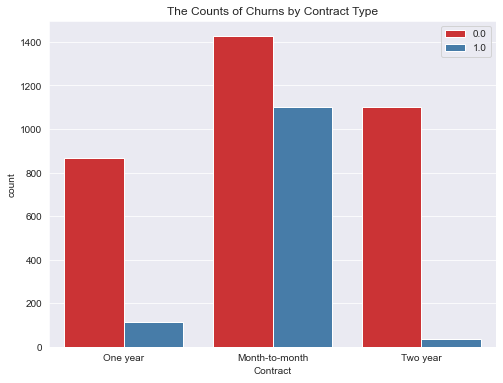

In [32]:
plt.figure(figsize=(8,6))
sns.countplot(x="Contract",hue="Churn Value", data=telco_df, palette="Set1")
plt.title("The Counts of Churns by Contract Type")
plt.legend()

**`Almost 40% of month to month contract have churned according to the table above.The percentage is very low when it comes to customers with One Year Contract and  customers with Two Year Contract. Therefore, this firm should focus more on the customers month ot month customer and make campaigns to retain them.`**

### <font color="brown">  Counting of Churn by Total charges :</font><a class= "anchor" id="subhead2"></a>

Text(0.5, 1.0, 'The Counts of Churns by Total Charges')

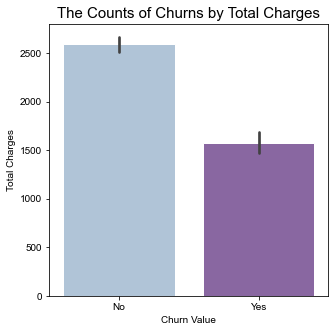

In [10]:
fig = plt.subplots(figsize=(5,5)) 
sns.set_style('darkgrid')
sns.barplot(data = telco_df, y="Total Charges", x ="Churn Value", palette="BuPu")
plt.title("The Counts of Churns by Total Charges", size=15)

### <font color="brown">  Counting of Churn by Monthly Charges :</font><a class= "anchor" id="subhead3"></a>

Text(0.5, 1.0, 'The Counts of Churns by Monthly Charges')

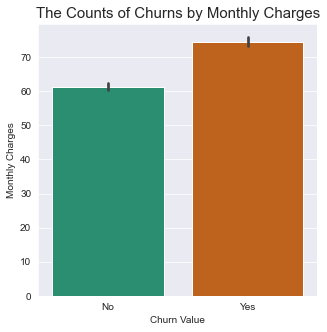

In [11]:
fig = plt.subplots(figsize=(5,5)) 
sns.barplot(data = telco_df, y="Monthly Charges", x="Churn Value", palette="Dark2")
plt.title("The Counts of Churns by Monthly Charges", size=15)

### <font color="brown"> Gender vs Churn Relationship : </font><a class= "anchor" id="subhead4"></a>

In [12]:
grp = telco_df.groupby(['Gender', 'Senior Citizen'])['Churn Value'].value_counts()
grp

Gender  Senior Citizen  Churn Value
Female  No              No             1456
                        Yes             471
        Yes             No              213
                        Yes             157
Male    No              No             1522
                        Yes             473
        Yes             No              220
                        Yes             154
Name: Churn Value, dtype: int64

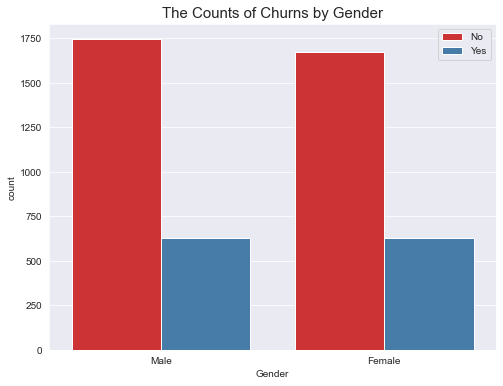

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(x="Gender",hue="Churn Value", data=telco_df, palette="Set1")
plt.title("The Counts of Churns by Gender", size=15)
plt.legend()

**`Here, As we can see in above graph the number of  male and female customer who are not senior citizen are tend to be higher in mumbers. So we can add some extra service for Senior Citizen.`**

### <font color="brown"> Internet Service - Churn Relationship :</font> <a class= "anchor" id="subhead5"></a>

In [14]:
telco_df.groupby('Internet Service')['Churn Value'].value_counts()

Internet Service  Churn Value
DSL               No             1295
                  Yes             313
Fiber optic       No             1173
                  Yes             872
No                No              938
                  Yes              76
Name: Churn Value, dtype: int64

In [15]:
# handling nan values
telco_df['Internet Service'].fillna("Fiber optic", inplace= True)

In [16]:
fig = px.histogram(telco_df, x="Churn Value", color="Internet Service", title="<b>Internet Service Types distribution vs Churn</b>")
fig.update_layout(width=900, height=600, bargap=0.1)
fig.show()

**`I have already found that people with fiber optic internet service tend to churn. This figure complies with this result. People with no internet service are stable and retain in the company. I think people with faster internet service like fiber optic can reach internet faster and can find other options that can be better than this company. Hence, this company should make some ads and campaigns in order to attract customers with fiber optic internet service.`**

### <font color="brown"> Payment Method  - Churn Relationship :</font> <a class= "anchor" id="subhead6"></a>

In [17]:
telco_df.groupby('Payment Method')['Churn Value'].value_counts()

Payment Method             Churn Value
Bank transfer (automatic)  No             848
                           Yes            174
Credit card (automatic)    No             849
                           Yes            163
Electronic check           No             848
                           Yes            725
Mailed check               No             883
                           Yes            202
Name: Churn Value, dtype: int64

In [18]:
# handling nan values
telco_df['Payment Method'].fillna("Electronic check", inplace= True)

In [19]:
fig = px.histogram(telco_df, x="Churn Value", color="Payment Method", title="<b>Customer Payment Method distribution vs Churn</b>")
fig.update_layout(width=900, height=600, bargap=0.1)
fig.show()

**`I have already found that people tend to churn if payment method is electronic ckeck when ckecking correlarion in the previous section.This figure demonstrates that people have higher rate of churn if payment method is electronic check. Therefore, company should deal with more with electronic check payment method and make some precautions.`**

### <font color="brown"> Multiple Lines - Churn Relationship :</font> <a class= "anchor" id="subhead7"></a>

In [20]:
telco_df.groupby('Multiple Lines')['Churn Value'].value_counts()

Multiple Lines    Churn Value
No                No             1661
                  Yes             557
No phone service  No              341
                  Yes             117
Yes               No             1416
                  Yes             579
Name: Churn Value, dtype: int64

In [21]:
# handling nan values
telco_df['Multiple Lines'].fillna("No", inplace= True)

In [22]:
fig = px.histogram(telco_df, x="Churn Value", color="Multiple Lines", title="<b>Customer Multiple Lines distribution vs Churn</b>")
fig.update_layout(width=900, height=600, bargap=0.1)
fig.show()

**`The figure shows that customers without multiple lines are more likely to churn. In this sense, this company may prioritize to manage services towards customers without multiple lines in order to retain them in the company.`**

###  <font color="brown"> Tenure Months - Churn Relationship :</font> <a class= "anchor" id="subhead8"></a>

In [23]:
# Outlier in Tenure Months
min_val = telco_df['Tenure Months'].mean() - (3 * telco_df['Tenure Months'].std())
print(min_val)

max_val = telco_df['Tenure Months'].mean() + (3 * telco_df['Tenure Months'].std())
print(max_val)

outliers = telco_df['Tenure Months'][telco_df['Tenure Months'] > max_val]
outliers.count()

-41.081856064594795
106.54869279928866


0

In [24]:
fig = px.box(telco_df, x='Churn Value', y = 'Tenure Months')

fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
fig.update_xaxes(title_text='Churn', row=1, col=1)

fig.update_layout(autosize=True, width=600, height=500,
    title_font=dict(size=25, family='Courier'),
    title='Tenure vs Churn',)

fig.show()

**`The figure shows that new customers tend to churn more than old customers. Therefore, new customers are risky group in terms of churn and needs more campaigns and attraction in order to retain them as customers in the future.`**

### <font color="brown"> Cities with Churn value :</font> <a class= "anchor" id="subhead9"></a>

In [25]:
telco_df.groupby('City')['Churn Value'].value_counts().sort_values()

City           Churn Value
Los Molinos    Yes              1
Livermore      Yes              1
Livingston     Yes              1
Lockeford      Yes              1
Lockwood       No               1
                             ... 
Sacramento     No              50
Los Angeles    Yes             53
San Francisco  No              54
San Diego      No              57
Los Angeles    No             128
Name: Churn Value, Length: 1732, dtype: int64

In [30]:
telco_df["Churn Value"].replace(value = [0, 1.], to_replace=["No", "Yes"], inplace = True)

In [31]:
fig = go.Figure(data=go.Scattergeo(locationmode="USA-states",
    lat=telco_df["Latitude"], lon=telco_df["Longitude"],
    text = telco_df['City'].astype(str),
    mode = 'markers',
    marker = dict(
        color = telco_df['Churn Value'],
        size = 5,
        colorbar = dict(
            titleside = "right",
            outlinecolor = "rgba(68, 68, 68, 0)",
            dtick = 0.1
        )
    )
))
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(
    title = " Most Customrr churned city in US(California)",
geo = dict(
            scope='usa'
        ),
    )
fig.show()

**`According to the above graph, Los Angeles city in the US(California) holds the highest number of retained customers and it also exists the highest number of customers who churned, thus the company would have to find the real cause of this trend and the company should run an ad or campaign in the city like _Los Molinos_, _Livermore_ etc, with low customers.`**